iter:  1
centroid:  [[ 9.36863088 -4.71720441]
 [-2.35430482  1.05198825]]


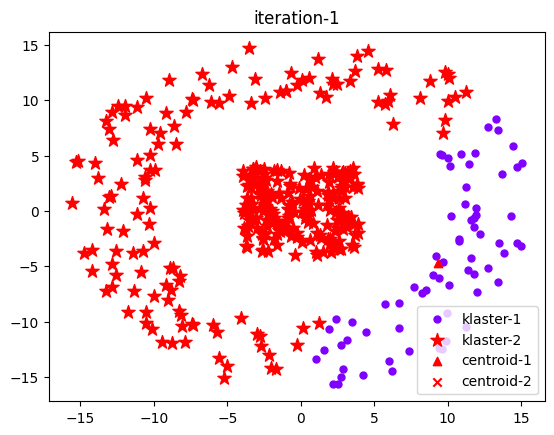

iter:  2
centroid:  [[ 8.41821786 -4.17673571]
 [-2.69522975  1.20043038]]


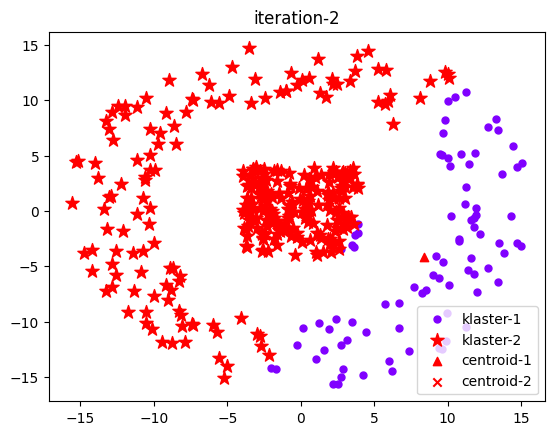

iter:  3
centroid:  [[ 7.84074433 -3.56546701]
 [-2.98717657  1.23544719]]


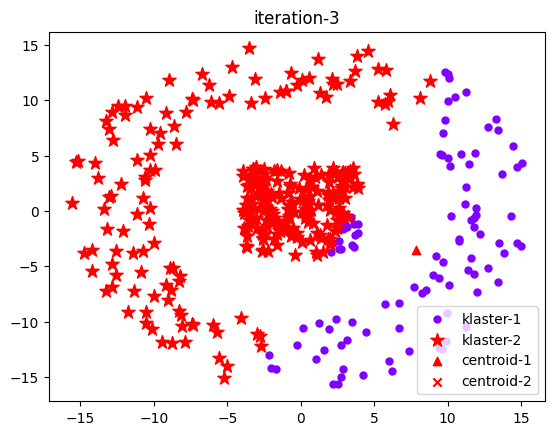

iter:  4
centroid:  [[ 7.31421909 -3.10388636]
 [-3.27284966  1.27557828]]


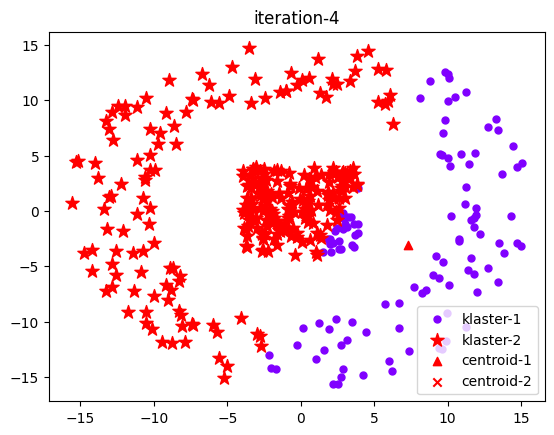

iter:  5
centroid:  [[ 6.9098876  -2.77886777]
 [-3.51490573  1.30728746]]


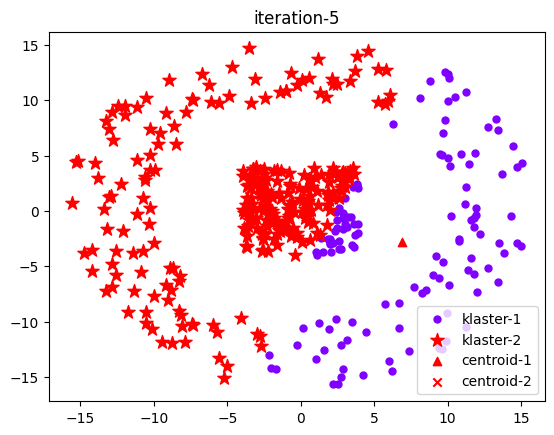

iter:  6
centroid:  [[ 6.54651805 -2.35347669]
 [-3.80243146  1.27903596]]


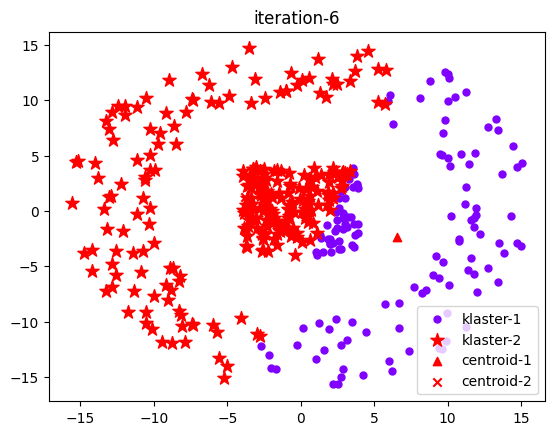

iter:  7
centroid:  [[ 6.17903581 -1.80925676]
 [-4.20261746  1.17563571]]


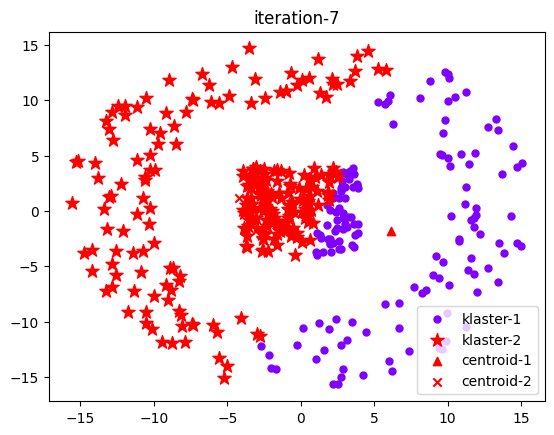

iter:  8
centroid:  [[ 5.92867312 -1.3211375 ]
 [-4.55479167  0.9994675 ]]


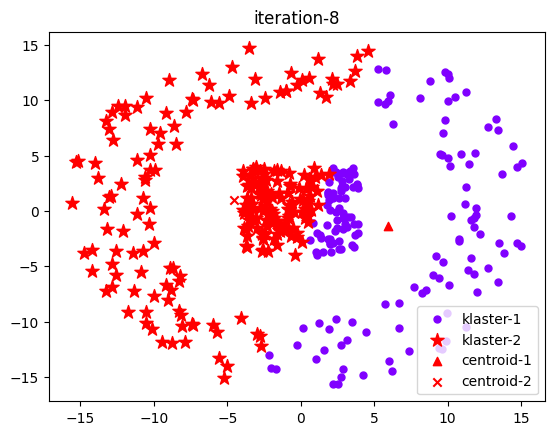

iter:  9
centroid:  [[ 5.84238133 -0.85940241]
 [-4.76238291  0.73141453]]


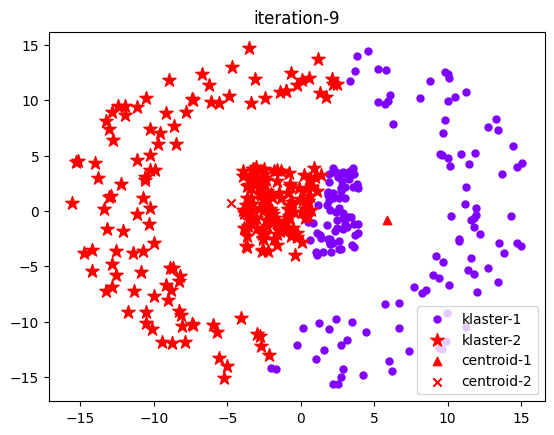

iter:  10
centroid:  [[ 5.7970716  -0.58052899]
 [-4.86695844  0.54805022]]


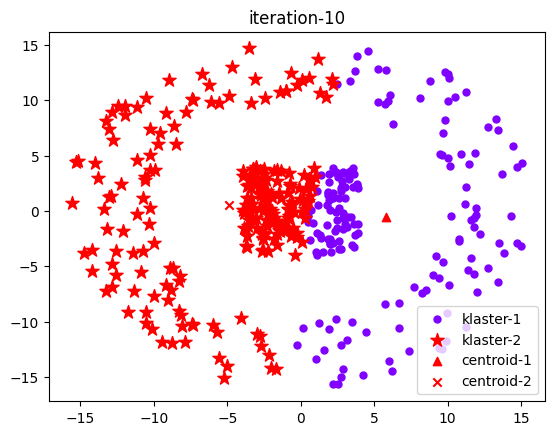

iter:  11
centroid:  [[ 5.64671143 -0.33052857]
 [-5.03438578  0.38370089]]


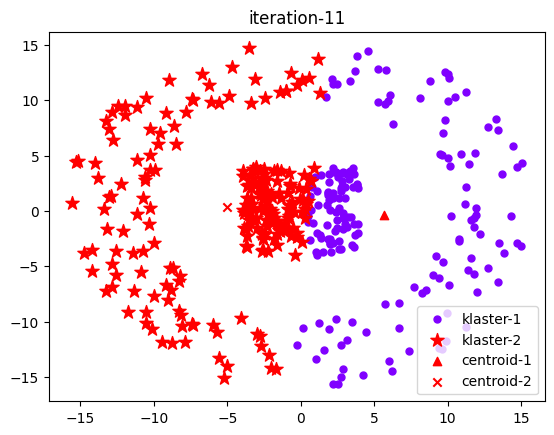

iter:  12
centroid:  [[ 5.45469011 -0.20228626]
 [-5.21704541  0.29957018]]


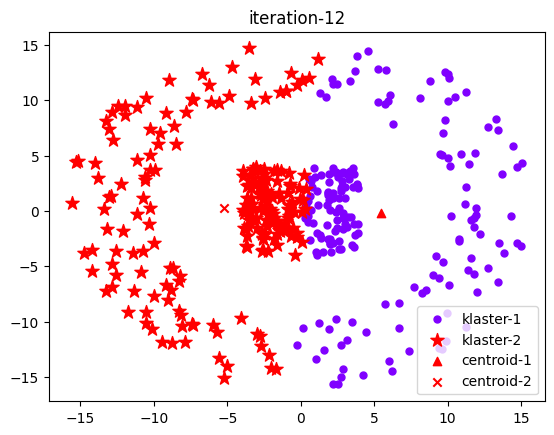

iter:  13
centroid:  [[ 5.31994973 -0.12197326]
 [-5.34926244  0.24084131]]


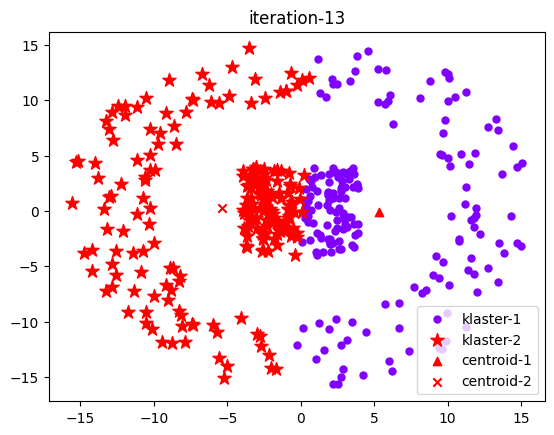

iter:  14
centroid:  [[ 5.24071474 -0.04037421]
 [-5.42999095  0.17219667]]


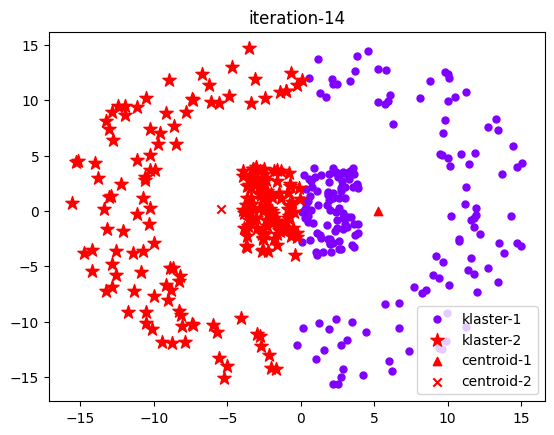

iter:  15
centroid:  [[ 5.21318691 -0.03435183]
 [-5.45588995  0.16771005]]


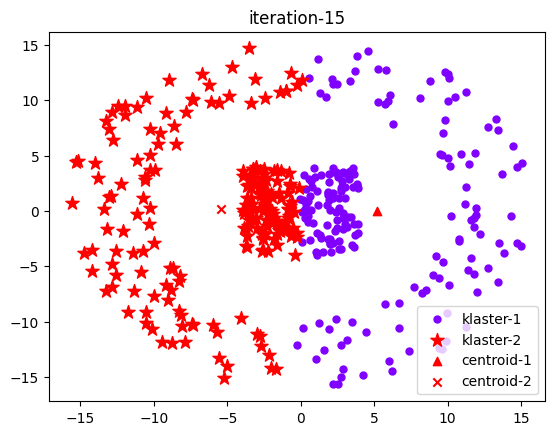

iter:  16
centroid:  [[ 5.18658229  0.02755417]
 [-5.48262548  0.1115375 ]]


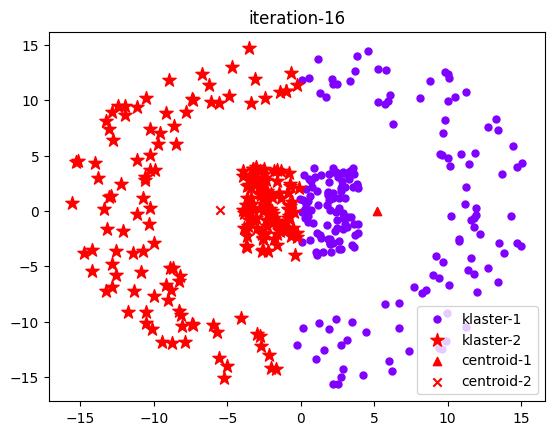

iter:  17
centroid:  [[ 5.18727865  0.10139115]
 [-5.48326827  0.04338029]]


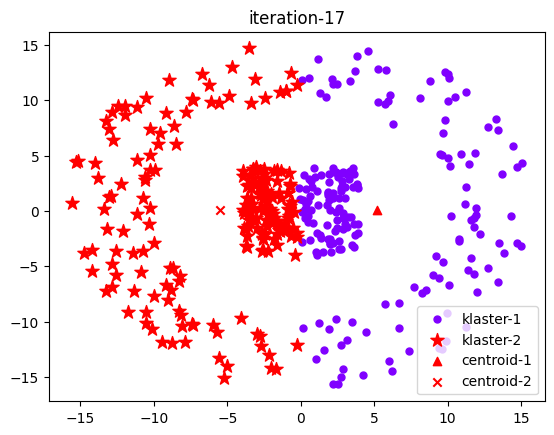

iter:  18
centroid:  [[ 5.18727865  0.10139115]
 [-5.48326827  0.04338029]]


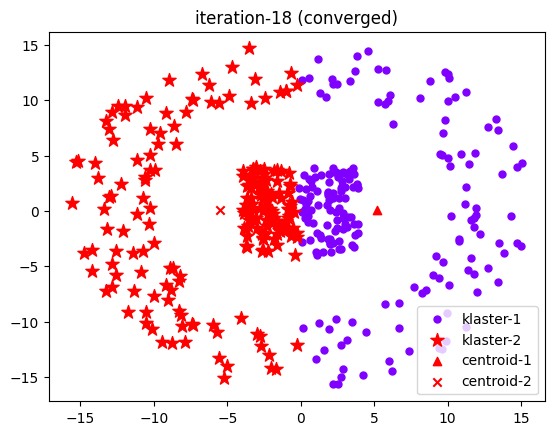

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm
import time
import itertools

# Read dataset from file
datasetPath = "/dataku.txt"
dataset = np.loadtxt(datasetPath, delimiter=" ")  # Load dataset
input = dataset  # Assign to input data

# Define k-means parameters
k = 2  # number of clusters
iterationCounter = 0  # iteration counter

# Function to initialize centroids randomly
def initCentroid(dataIn, k):
    result = dataIn[np.random.choice(dataIn.shape[0], k, replace=False)]
    return result

# Function to plot clustering result per iteration
def plotClusterResult(listClusterMembers, centroid, iteration, converged):
    n = listClusterMembers.__len__()
    color = iter(cm.rainbow(np.linspace(0, 1, n)))  # Generate a color map
    plt.figure("result")
    plt.clf()
    plt.title("iteration-" + iteration)
    marker = itertools.cycle(('.', '*', '^', 'x', '+'))  # Different markers
    for i in range(n):
        col = next(color)  # Get the next color from the color map
        memberCluster = np.asmatrix(listClusterMembers[i])
        plt.scatter(np.ravel(memberCluster[:, 0]), np.ravel(memberCluster[:, 1]),
                    marker=next(marker), s=100, color=col, label="klaster-" + str(i + 1))
    for i in range(n):
        plt.scatter((centroid[i, 0]), (centroid[i, 1]), marker=next(marker),
                    color=col, label="centroid-" + str(i + 1))
    if(converged == 0):
        plt.legend()
        plt.ion()
        plt.show()
        plt.pause(0.1)
    if (converged == 1):
        plt.legend()
        plt.show(block=True)

# Main k-means algorithm function
def kMeans(data, centroidInit):
    nCluster = k  # number of clusters
    global iterationCounter
    centroidInit = np.matrix(centroidInit)
    # Loop until convergence
    while(True):
        iterationCounter +=1
        euclideanMatrixAllCluster = np.ndarray(shape=(data.shape[0], 0))
        # Repeat for all clusters
        for i in range(0, nCluster):
            centroidRepeated = np.repeat(centroidInit[i,:], data.shape[0], axis=0)
            deltaMatrix = abs(np.subtract(data,centroidRepeated))
            # Calculate Euclidean distance
            euclideanMatrix = np.sqrt(np.square(deltaMatrix).sum(axis=1))
            euclideanMatrixAllCluster = \
                np.concatenate((euclideanMatrixAllCluster, euclideanMatrix), axis=1)
        # Assign data to the nearest cluster
        clusterMatrix = np.ravel(np.argmin(np.matrix(euclideanMatrixAllCluster), axis=1))
        listClusterMember = [[] for i in range(k)]
        for i in range(0, data.shape[0]):  # assign data to cluster based on cluster matrix
            listClusterMember[clusterMatrix[i].item()].append(data[i,:])  # Use .item() instead of np.asscalar()
        # Calculate the new centroids
        newCentroid = np.ndarray(shape=(0, centroidInit.shape[1]))
        for i in range(0, nCluster):
            memberCluster = np.asmatrix(listClusterMember[i])
            centroidCluster = memberCluster.mean(axis=0)
            newCentroid = np.concatenate((newCentroid, centroidCluster), axis=0)
        print("iter: ", iterationCounter)
        print("centroid: ", newCentroid)
        # Break the loop if converged
        if((centroidInit == newCentroid).all()):
            break
        # Update centroids with new values
        centroidInit = newCentroid
        # Plot the cluster results
        plotClusterResult(listClusterMember, centroidInit, str(iterationCounter), 0)
        time.sleep(1)  # Add a 1-second pause to make the plot readable
    return listClusterMember, centroidInit

# Initialize centroids and run k-means
centroidInit = initCentroid(input, k)
clusterResults, centroid = kMeans(input, centroidInit)

# Plot final clustering result after convergence
plotClusterResult(clusterResults, centroid, str(iterationCounter) + " (converged)", 1)
